In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Data Preparation

In [3]:
dataset = pd.read_csv("OD_Dataset.csv")
dataset2 = dataset[['SST', 'SSC', 'SLP','AT','Catch', 'Label']]
dataset2

,SST,SSC,SLP,AT,Catch,Label
0,28.713878,0.153200,1010.423500,30.212682,43934.09800,NPFZ
1,28.722450,0.160000,1010.495918,27.779787,5138.23300,NPFZ
2,29.214850,0.130000,1007.234500,27.612174,14151.87400,NPFZ
3,29.337951,0.028820,1004.093299,27.545814,63763.75896,NPFZ
4,29.515721,0.087811,1001.634852,27.914788,83218.67463,NPFZ
...,...,...,...,...,...,...
127,30.783003,0.176246,1006.088882,27.330665,37648.43892,NPFZ
128,30.213613,0.194089,1006.930154,27.759000,39799.59449,NPFZ
129,29.485909,0.220000,1009.680227,28.135843,43065.21100,PFZ
130,28.659535,0.240000,1013.386250,28.333843,48131.72500,PFZ


In [4]:
dataset2['Label']=dataset2['Label'].map({'PFZ':0,'NPFZ':1})
dataset2

<ipython-input-4-fbf6fdbab1f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2['Label']=dataset2['Label'].map({'PFZ':0,'NPFZ':1})


,SST,SSC,SLP,AT,Catch,Label
0,28.713878,0.153200,1010.423500,30.212682,43934.09800,1
1,28.722450,0.160000,1010.495918,27.779787,5138.23300,1
2,29.214850,0.130000,1007.234500,27.612174,14151.87400,1
3,29.337951,0.028820,1004.093299,27.545814,63763.75896,1
4,29.515721,0.087811,1001.634852,27.914788,83218.67463,1
...,...,...,...,...,...,...
127,30.783003,0.176246,1006.088882,27.330665,37648.43892,1
128,30.213613,0.194089,1006.930154,27.759000,39799.59449,1
129,29.485909,0.220000,1009.680227,28.135843,43065.21100,0
130,28.659535,0.240000,1013.386250,28.333843,48131.72500,0


In [5]:
X = dataset2[['SST', 'SSC', 'SLP']]
Y = dataset2[['Label']]

In [6]:
#Data Preprocessing

In [7]:
from sklearn import preprocessing
X_prep = preprocessing.normalize(X, norm='l2')
Y_prep = np.squeeze(np.array(Y).reshape(1,-1))

In [8]:
#Model Evaluation and Testing

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_prep,Y_prep, test_size=0.33, random_state=40)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

In [10]:
#Decision Tree

In [11]:
from sklearn import tree
DTC = tree.DecisionTreeClassifier()
DTC = DTC.fit(X_train,y_train)

In [12]:
result = DTC.predict(X_test)
accuracy_score(y_test,result)

0.9545454545454546

In [13]:
confusion_matrix(y_test,result)

array([[12,  1],
       [ 1, 30]], dtype=int64)

In [14]:
scores = cross_val_score(DTC, X_train, y_train, cv = 10)
scores.std()
scores.mean()

0.9305555555555556

In [15]:
param = {
    "criterion": ['gini', 'entropy'],
    "max_depth": range(1,10),
    "min_samples_leaf": range(1,5),
    "min_samples_split": range(2,10)
}

In [16]:
grid = RandomizedSearchCV(DTC,
                    param_distributions = param,
                    scoring = 'accuracy',
                    cv = 10,
                    n_jobs = -1,
                    return_train_score = False,
                    n_iter = 100)
grid.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 10),
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(2, 10)},
                   scoring='accuracy')

In [17]:
grid.best_params_

{'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_depth': 2,
 'criterion': 'entropy'}

In [18]:
grid.best_score_

0.9541666666666666

In [19]:
#Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=0)
RFC = RFC.fit(X_train, y_train)

In [21]:
result = RFC.predict(X_test)
accuracy_score(y_test,result)

0.9318181818181818

In [22]:
confusion_matrix(y_test,result)

array([[13,  0],
       [ 3, 28]], dtype=int64)

In [23]:
scores = cross_val_score(RFC, X_train, y_train, cv = 10)
scores.std()
scores.mean()

0.9541666666666666

In [24]:
param = {
    "n_estimators": range(10,100),
    "criterion": ['gini', 'entropy'],
    "max_depth": range(1,10),
    "min_samples_leaf": range(1,5),
    "min_samples_split": range(2,10)
}

In [25]:
grid = RandomizedSearchCV(RFC,
                    param_distributions = param,
                    scoring = 'accuracy',
                    cv = 10,
                    n_jobs = -1,
                    return_train_score = False,
                    n_iter = 100)
grid.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 10),
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': range(10, 100)},
                   scoring='accuracy')

In [26]:
grid.best_params_

{'n_estimators': 15,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_depth': 2,
 'criterion': 'gini'}

In [27]:
grid.best_score_

0.9652777777777779

In [28]:
#Support Vector Machine

In [29]:
from sklearn import svm
SVM = svm.SVC() # svm classifer
SVM = SVM.fit(X_train, y_train)

In [30]:
result = SVM.predict(X_test)
accuracy_score(y_test,result)

0.7045454545454546

In [31]:
confusion_matrix(y_test,result)

array([[ 0, 13],
       [ 0, 31]], dtype=int64)

In [32]:
scores = cross_val_score(SVM, X_train, y_train, cv = 10)
scores.std()
scores.mean()

0.5694444444444444

In [33]:
param = {
    "C" : range(1,10),
    "degree": range(1,100),
    "gamma": ['auto', 'scale']
}

In [34]:
grid = RandomizedSearchCV(SVM,
                    param_distributions = param,
                    scoring = 'accuracy',
                    cv = 10,
                    n_jobs = -1,
                    return_train_score = False,
                    n_iter = 100)
grid.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=SVC(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': range(1, 10),
                                        'degree': range(1, 100),
                                        'gamma': ['auto', 'scale']},
                   scoring='accuracy')

In [35]:
grid.best_params_

{'gamma': 'auto', 'degree': 81, 'C': 4}

In [36]:
grid.best_score_

0.5694444444444444

In [37]:
#K-Nearest Neighbor

In [38]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [39]:
result = KNN.predict(X_test)
accuracy_score(y_test,result)

0.7045454545454546

In [40]:
confusion_matrix(y_test,result)

array([[ 5,  8],
       [ 5, 26]], dtype=int64)

In [41]:
scores = cross_val_score(KNN, X_train, y_train, cv = 10)
scores.std()
scores.mean()

0.7347222222222222

In [42]:
param = {
    "n_neighbors" : range(1,30),
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "leaf_size": range(1,30)
}

In [43]:
grid = RandomizedSearchCV(KNN,
                    param_distributions = param,
                    scoring = 'accuracy',
                    cv = 10,
                    n_jobs = -1,
                    return_train_score = False,
                    n_iter = 100)
grid.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': range(1, 30),
                                        'n_neighbors': range(1, 30)},
                   scoring='accuracy')

In [44]:
grid.best_params_

{'n_neighbors': 1, 'leaf_size': 17, 'algorithm': 'brute'}

In [45]:
grid.best_score_

0.7958333333333333

In [50]:
dataset = pd.read_csv("accuracy_comparison.csv")
dataset

,Model,RSScore,WRSScore
0,DT,0.9541,0.9545
1,RF,0.9652,0.9318
2,KNN,0.7347,0.7045
3,SVM,0.5694,0.7045


In [51]:
index = ['DT','RF','KNN','SVM']
df = pd.DataFrame({'Accuracy Score with Random Search': dataset['RSScore'].values.tolist()}, index=index)

Text(0, 0.5, 'Score')

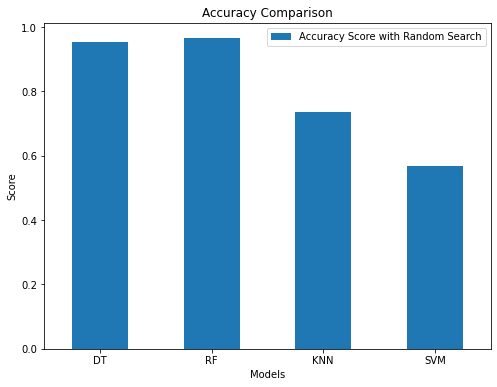

In [52]:
df.plot.bar(rot=0, figsize=(8,6))
plt.title("Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Score")